In [1]:
import climetlab as cml
import cems_flood_viewer as cmw

In [2]:
nwse = [50.972204,5.450796, 46.296530, 11.871059] # Ryne

In [3]:
forecast = cml.load_dataset(
            'cems-flood-glofas-forecast',
            model='lisflood',
            product_type='ensemble_perturbed_forecasts',
            system_version='operational',
            period= '20220101',#'2001-200401-04*',
            leadtime = '24-720',
            variable="river_discharge_in_the_last_24_hours",
            area= nwse
        )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/ecmwf-lab/climetlab_cems_flood/LICENSEIf you do not agree with such terms, do not download the data. 


In [4]:
ds = forecast.to_xarray()
ds

2022-03-18 20:18:44,814 WARNING Ignoring index file '/home/iff/climet-cache/c-dsretriever-8c7ad77cf2ded5c1b03c7340d9ec539dbd88c9cdeeddc1e662b6ebcdea4e4dc2.grib.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:                  (realization: 50, forecast_reference_time: 1,
                              leadtime: 30, lat: 47, lon: 66)
Coordinates:
  * realization              (realization) int64 1 2 3 4 5 6 ... 46 47 48 49 50
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2022-01-01
  * leadtime                 (leadtime) timedelta64[ns] 1 days ... 30 days
  * lat                      (lat) float64 46.36 46.46 46.56 ... 50.86 50.96
  * lon                      (lon) float64 5.451 5.551 5.651 ... 11.85 11.95
    time                     (forecast_reference_time, leadtime) datetime64[ns] dask.array<chunksize=(1, 30), meta=np.ndarray>
Data variables:
    dis24                    (realization, forecast_reference_time, leadtime, lat, lon) float32 dask.array<chunksize=(50, 1, 30, 47, 66), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-18T20:18 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (1, 30) and (30, 50)

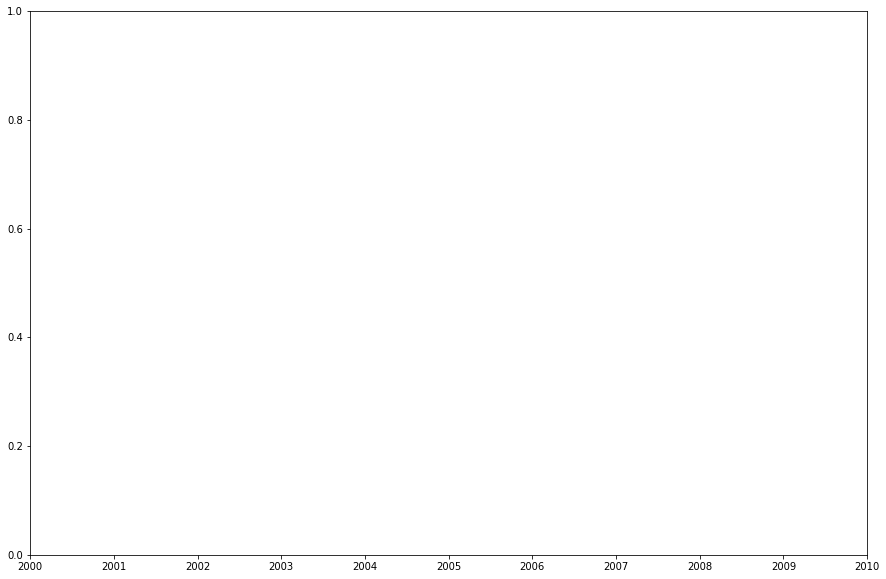

In [6]:
plt.figure(figsize=(15,10))
_ = plt.plot(ds.dis24.time.values,ds.dis24.isel(forecast_reference_time=0,drop=True).mean(["lat","lon"]).values.T)